In [53]:
import pandas as pd
import os
import seaborn as sns


def district(borough: int):
    if borough == 1:
        return "Manhattan"
    elif borough == 2:
        return "Bronx"
    elif borough == 3:
        return "Brooklyn"
    elif borough == 4:
        return "Queens"
    elif borough == 5:
        return "Staten"



dir_path = "dataset/"
res = []
data = []
for path in os.listdir(dir_path):
    res.append(path)
    dirty_data = pd.read_excel(dir_path + path, skiprows=4)
    dirty_data.columns = [column.lower().replace("\n", "")
                          .replace(" ", "_").replace("-", "_")
                          for column in
                          dirty_data.columns]
    data.append(dirty_data)
# df = pd.read_csv("dataset/nyt1.csv")
data = pd.concat(data)

data.insert(1, "district", [district(a) for a in data.borough])
print(data.columns)
print(data)

Index(['borough', 'district', 'neighborhood', 'building_class_category',
       'tax_class_at_present', 'block', 'lot', 'ease_ment',
       'building_class_at_present', 'address', 'apartmentnumber', 'zip_code',
       'residential_units', 'commercial_units', 'total_units',
       'land_square_feet', 'gross_square_feet', 'year_built',
       'tax_class_at_time_of_sale', 'building_class_at_time_of_sale',
       'saleprice', 'sale_date'],
      dtype='object')
      borough district               neighborhood  \
0           2    Bronx  BATHGATE                    
1           2    Bronx  BATHGATE                    
2           2    Bronx  BATHGATE                    
3           2    Bronx  BATHGATE                    
4           2    Bronx  BATHGATE                    
...       ...      ...                        ...   
6351        5   Staten  WOODROW                     
6352        5   Staten  WOODROW                     
6353        5   Staten  WOODROW                     
6354    

In [54]:
print(data)


      borough district               neighborhood  \
0           2    Bronx  BATHGATE                    
1           2    Bronx  BATHGATE                    
2           2    Bronx  BATHGATE                    
3           2    Bronx  BATHGATE                    
4           2    Bronx  BATHGATE                    
...       ...      ...                        ...   
6351        5   Staten  WOODROW                     
6352        5   Staten  WOODROW                     
6353        5   Staten  WOODROW                     
6354        5   Staten  WOODROW                     
6355        5   Staten  WOODROW                     

                           building_class_category tax_class_at_present  \
0     01  ONE FAMILY HOMES                                            1   
1     01  ONE FAMILY HOMES                                            1   
2     01  ONE FAMILY HOMES                                            1   
3     01  ONE FAMILY HOMES                                     

    district  borough  neighborhood  building_class_category  \
0      Bronx     5268          5268                     5268   
1   Brooklyn    23373         23373                    23373   
2  Manhattan    27395         27395                    27395   
3     Queens    23583         23583                    23583   
4     Staten     6356          6356                     6356   

   tax_class_at_present  block    lot  ease_ment  building_class_at_present  \
0                  5268   5268   5268       5268                       5268   
1                 23373  23373  23373      23373                      23373   
2                 27395  27395  27395      27395                      27395   
3                 23583  23583  23583      23583                      23583   
4                  6356   6356   6356       6356                       6356   

   address  ...  residential_units  commercial_units  total_units  \
0     5268  ...               5268              5268         5268   
1 

[Text(0.5, 1.0, 'Orders in district'), Text(0, 0.5, 'Orders')]

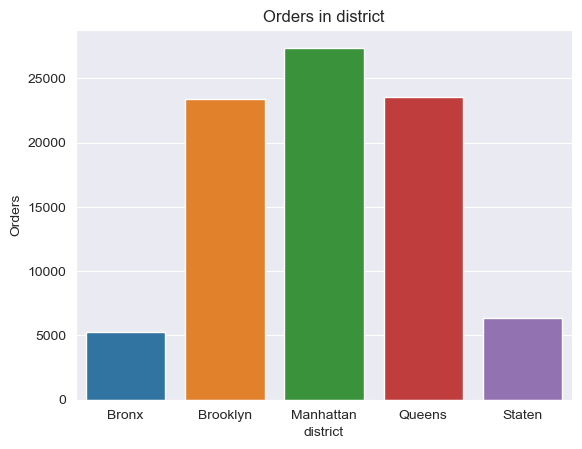

In [55]:
district_data_order = data.groupby(["district"], as_index=False).count()
print(district_data_order)

ax = sns.barplot(data=district_data_order,
                 x=district_data_order.district,
                 y=district_data_order.borough,
                 )
ax.set(title= "Orders in district" , ylabel="Orders")

district: ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten'],
 earnings$:[2856904409, 12349936217, 50625977883, 8602994166, 1660481167]


[Text(0.5, 1.0, 'Orders in district'), Text(0, 0.5, 'Orders')]

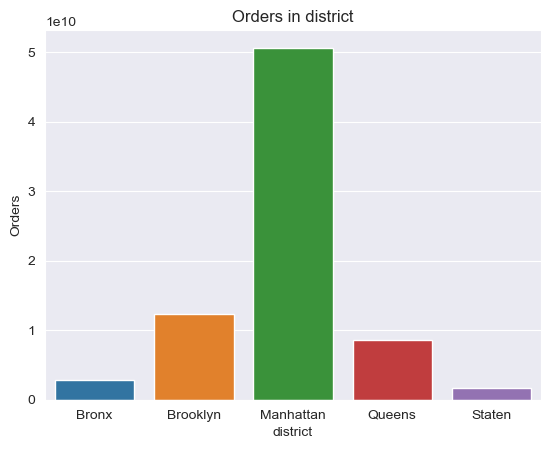

In [56]:
sum_data_order = data.groupby(["district"], as_index=False).sum()
print("district: {},\n earnings$:{}" .format(sum_data_order.district.to_list() , sum_data_order.saleprice.to_list() ))

ax = sns.barplot(data=sum_data_order,
                 x=sum_data_order.district,
                 y=sum_data_order.saleprice,
                 )
ax.set(title= "Orders in district" , ylabel="Orders")

In [57]:
data_price_zero  = data[data.saleprice <= 10].borough.count()
data_price_great = data[data.saleprice > 10].borough.count()
print(data_price_zero)
ax = sns.barplot(data=data,
                 x=data_price_zero.borough,
                 y=data_price_great.borough,
                 )

29575


AttributeError: 'numpy.int64' object has no attribute 'borough'